# Overtime - Centrality features (Demonstrations)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import overtime as ot

This notebook is for the purposes of demonstrating the capabilities of Overtime which relate to calculating _temporal_ centrality values for nodes in temporal graphs.

The notebook shows each method we have implemented in the process of implementing our main methods for computing temporal centrality metrics. The document aims to demonstrate the use of the algorithms on small dummy networks and larger networks from real datasets. It also seeks to show the way in which we have altered the visualisation methods to include the option to size/ color nodes by centrality.

__Contents:__
 - Temporal degree centrality
     - Restricting to labels or time intervals
     - DiGraphs - in/ out degree
     - Ordering outputs
 - Temporal closeness centrality
     - Fastest/ shortest paths
     - Centrality evolution
 - Temporal betweenness centrality
 - Temporal pagerank
 - Visualisation

## Temporal degree centrality

### Small dummy network

In [2]:
# Create an undirected graph and add nodes and edges
test_graph = ot.TemporalGraph(label="test_graph")

nodes = ["A", "B", "C", "D"]

edges = [
    ["A", "B", 1, None],
    ["A", "C", 1, None],
    ["A", "C", 2, None],
    ["A", "B", 3, None],
    ["B", "C", 4, None],
    ["A", "D", 4, None],
    ["B", "D", 5, None]
]

for node in nodes:
    test_graph.add_node(node)

for edge in edges:
    test_graph.add_edge(edge[0], edge[1], edge[2], edge[3])

# Run temporal degree with default parameters
temporal_degree_values = ot.temporal_degree(test_graph)
print("Temporal degree values with default parameters: " + str(temporal_degree_values))

# Restrict to subset of labels
temporal_degree_values = ot.temporal_degree(test_graph, labels=["A", "B"])
print("Temporal degree values of nodes A and B: " + str(temporal_degree_values))

# Restrict to time intervals
temporal_degree_values = ot.temporal_degree(test_graph, intervals=[(1, 3)])
print("Temporal degree values over interval [1, 3]: " + str(temporal_degree_values))

# Convert to DiGraph
test_graph.directed = True

# Calculate temporal in-degree / out-degree
temporal_degree_values = ot.temporal_degree(test_graph, in_out="in")
print("Temporal in-degree values: " + str(temporal_degree_values))

temporal_degree_values = ot.temporal_degree(test_graph, in_out="out")
print("Temporal out-degree values: " + str(temporal_degree_values))

Temporal degree values with default parameters: {'A': 1.0, 'B': 0.8, 'C': 0.6, 'D': 0.4}
Temporal degree values of nodes A and B: {'A': 1.0, 'B': 0.8}
Temporal degree values over interval [1, 3]: {'A': 1.3333333333333333, 'B': 0.6666666666666666, 'C': 0.6666666666666666}
Temporal in-degree values: {'B': 0.4, 'C': 0.6, 'D': 0.4}
Temporal out-degree values: {'A': 1.0, 'B': 0.4}


### Larger network

In [3]:
# Create larger tfl network
tfl_network = ot.TemporalDiGraph("tfl_network", data=ot.CsvInput("victoria_central_bakerloo_piccadilly-inbound_outbound.csv"))

temporal_degree_values = ot.temporal_degree(tfl_network, in_out="out")

# Get degree values and order by centrality value
ordered_degree_values = ot.order_centrality(temporal_degree_values)
print("Ordered degree centrality values for tfl network: \n")

for station, value in ordered_degree_values.items():
    print(station, value)

Ordered degree centrality values for tfl network: 

Oxford Circus 0.2529411764705882
Green Park 0.24705882352941178
King's Cross St. Pancras 0.24705882352941178
Finsbury Park 0.2411764705882353
Piccadilly Circus 0.21764705882352942
Holborn 0.1411764705882353
Blackhorse Road 0.12941176470588237
Stockwell 0.12941176470588237
Tottenham Hale 0.12941176470588237
Vauxhall 0.12941176470588237
Seven Sisters 0.12941176470588237
Pimlico 0.12941176470588237
Victoria 0.12941176470588237
Highbury & Islington 0.12941176470588237
Warren Street 0.12941176470588237
Euston 0.12941176470588237
Oakwood 0.12352941176470589
Southgate 0.12352941176470589
Arnos Grove 0.12352941176470589
Bounds Green 0.12352941176470589
Wood Green 0.12352941176470589
Turnpike Lane 0.12352941176470589
Russell Square 0.11764705882352941
Acton Town 0.11764705882352941
Covent Garden 0.11764705882352941
Leicester Square 0.11764705882352941
Hyde Park Corner 0.11764705882352941
Knightsbridge 0.11764705882352941
Barons Court 0.1176470

## Temporal closeness centrality

### Small dummy network
#### Demonstrating optimal path algorithms

In [4]:
# Setup graph
test_graph = ot.TemporalDiGraph(label="test_graph")

nodes = ["A", "B", "C", "D", "E", "F", "S", "Z"]

edges = [
    ["S", "A", 1, 2],
    ["S", "B", 1, 2],
    ["B", "C", 2, 3],
    ["C", "D", 3, 4],
    ["S", "E", 3, 4],
    ["D", "Z", 4, 5],
    ["E", "F", 4, 5],
    ["A", "Z", 5, 6],
    ["F", "Z", 5, 6]
]

for node in nodes:
    test_graph.add_node(node)

for edge in edges:
    test_graph.add_edge(edge[0], edge[1], edge[2], edge[3])

<img src="graph_fastest.png" align="left"/>
<br><br><br>
Traversal time = 1

Fastest path: Minimizes total elapsed time<br>
Shortest path: Minimizes traversal time on edges

In [5]:
# Run optimal paths algorithms

fastest_paths_S = ot.calculate_fastest_path_durations(test_graph, "S")
shortest_paths_S = ot.calculate_shortest_path_lengths(test_graph, "S")

print("Durations of fastest paths from S to Z:  " + str(fastest_paths_S))
print("Lengths of shortest paths from S to Z:   " + str(shortest_paths_S))

Durations of fastest paths from S to Z:  {'E': 1, 'F': 2, 'B': 1, 'S': 0, 'A': 1, 'C': 2, 'Z': 3, 'D': 3}
Lengths of shortest paths from S to Z:   {'E': 1, 'F': 2, 'B': 1, 'S': 0, 'A': 1, 'C': 2, 'Z': 2, 'D': 3}


### Larger network
#### Demonstrating closeness algorithm

In [6]:
# Using tfl network again
temporal_closeness_values = ot.temporal_closeness(tfl_network, optimality="fastest")

ordered_closeness_values = ot.order_centrality(temporal_closeness_values)

for station, value in ordered_closeness_values.items():
    print(station, value)

Oxford Circus 10.043609833601327
Tottenham Court Road 9.025085126042006
Piccadilly Circus 8.743572850250747
Baker Street 8.597918274912432
Holborn 8.527071708028192
Green Park 8.29734194027147
Edgware Road (Bakerloo) 8.265057460370674
Covent Garden 8.147826458318018
Knightsbridge 7.8983825696406065
Paddington 7.684908218448237
Leicester Square 7.483676442618723
Maida Vale 7.2020151455677155
Russell Square 7.119853424674372
King's Cross St. Pancras 7.018579516908253
Euston 6.753390693668009
St. Paul's 6.736255239772203
Bank 6.593416767508214
Holloway Road 6.562628488858105
Chancery Lane 6.529284783211964
Earl's Court 6.481753210140211
South Kensington 6.384029711539058
Victoria 6.327761078436853
Gloucester Road 6.20662146297282
Arsenal 6.205882467338586
Kilburn Park 6.146429380017776
Liverpool Street 6.1065953848627945
Caledonian Road 6.094486009116332
Waterloo 6.007626376071224
Pimlico 5.997674647367183
Queen's Park 5.943546480684191
Warren Street 5.855052680476954
Barons Court 5.65386

In [7]:
# Show centrality evolution
evolving_values = ot.temporal_closeness(tfl_network, optimality="shortest", cent_evo=True)

In [8]:
t=0
for closeness_value in evolving_values["Oxford Circus"]:
    print(t, closeness_value)
    t += 1

0 16.08463022920659
1 16.08463022920659
2 16.08463022920659
3 16.08463022920659
4 16.08463022920659
5 16.08463022920659
6 16.08463022920659
7 16.08463022920659
8 16.08463022920659
9 16.08463022920659
10 16.08463022920659
11 16.08463022920659
12 16.08463022920659
13 17.614671789165268
14 17.614671789165268
15 17.614671789165268
16 17.614671789165268
17 17.614671789165268
18 17.614671789165268
19 17.614671789165268
20 17.614671789165268
21 17.614671789165268
22 17.614671789165268
23 17.640681964695904
24 17.025038782977205
25 17.025038782977205
26 17.025038782977205
27 17.025038782977205
28 17.640681964695904
29 16.2284716548769
30 16.2284716548769
31 16.2284716548769
32 15.370378990802605
33 14.75473580908391
34 14.75473580908391
35 14.75473580908391
36 15.577325034401394
37 17.824220297372168
38 19.21460034100559
39 19.21460034100559
40 19.21460034100559
41 18.405900930185954
42 18.463234635128355
43 18.463234635128355
44 18.463234635128355
45 18.553009646327858
46 18.553009646327858
4

## Temporal betweenness

### Larger network

In [9]:
betweenness_values = ot.temporal_betweenness(tfl_network, optimality="foremost")

In [10]:
ordered_betweenness = ot.order_centrality(betweenness_values)

for station, value in ordered_betweenness.items():
    print(station, value)

Oxford Circus 7554.042780748648
Green Park 5384.000000000002
Hyde Park Corner 4640.000000000001
Knightsbridge 4557.0
South Kensington 4469.999999999999
Gloucester Road 4378.999999999997
Earl's Court 4283.999999999995
Barons Court 4185.000000000001
Acton Town 4144.000000000002
Hammersmith (Dist&Picc Line) 4082.0
Turnham Green 3974.9999999999973
King's Cross St. Pancras 3199.9509202454014
Warren Street 3159.0000000000005
Euston 3035.999999999997
Regent's Park 2974.999999999999
Baker Street 2832.0000000000005
Marylebone 2684.999999999999
Highbury & Islington 2557.9509202454005
Edgware Road (Bakerloo) 2533.9999999999986
Finsbury Park 2520.999999999999
Paddington 2379.0
Ealing Common 2378.9999999999995
North Ealing 2220.0
Warwick Avenue 2219.9999999999995
Park Royal 2057.0000000000005
Maida Vale 2056.999999999999
Holborn 2028.9999999999998
Alperton 1889.9999999999993
Kilburn Park 1889.9999999999993
South Ealing 1719.0000000000007
Sudbury Town 1719.0000000000002
Queen's Park 1718.99999999999

## Temporal pagerank

### Small dummy network

In [11]:
# Setup graph
test_graph = ot.TemporalDiGraph(label="test_graph")

nodes = ["A", "B", "C", "D", "E", "F", "G", "H"]

edges = [
    ["C", "A", 1, None],
    ["E", "A", 2, None],
    ["G", "A", 3, None],
    ["C", "B", 4, None],
    ["A", "C", 5, None],
    ["B", "A", 6, None],
    ["C", "G", 7, None],
    ["H", "E", 8, None],
    ["D", "E", 9, None],
    ["B", "H", 10, None],
    ["B", "E", 11, None],
    ["F", "E", 12, None]
]

for node in nodes:
    test_graph.add_node(node)

for edge in edges:
    test_graph.add_edge(edge[0], edge[1], edge[2], edge[3])

<img src="graph_PR.png" align="left"/>
<br><br><br>
A initially more important than E<br>
E becomes more important over time

In [12]:
pr_scores = ot.temporal_pagerank(test_graph, alpha=0.85, beta=0.5)

for node, PR in pr_scores.items():
    print(node, PR)

G [0, 0, 0.15000000000000002, 0, 0, 0, 0.1275, 0, 0, 0, 0, 0]
H [0, 0, 0, 0, 0, 0, 0, 0.15000000000000002, 0, 0.1275, 0, 0]
B [0, 0, 0, 0.1275, 0, 0.15000000000000002, 0, 0, 0, 0.15000000000000002, 0.15000000000000002, 0]
F [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.15000000000000002]
C [0.15000000000000002, 0, 0, 0.15000000000000002, 0.1275, 0, 0.15000000000000002, 0, 0, 0, 0, 0]
E [0, 0.15000000000000002, 0, 0, 0, 0, 0, 0.1275, 0.1275, 0, 0.1275, 0.1275]
A [0.1275, 0.1275, 0.1275, 0, 0.15000000000000002, 0.1275, 0, 0, 0, 0, 0, 0]
D [0, 0, 0, 0, 0, 0, 0, 0, 0.15000000000000002, 0, 0, 0]


## Visualisation

#### Temporal closeness

Double click to zoom!

C:\Users\JBR\anaconda3\envs\ot_demo\lib\site-packages\overtime\plots\scatter.py:115: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.figure.show()


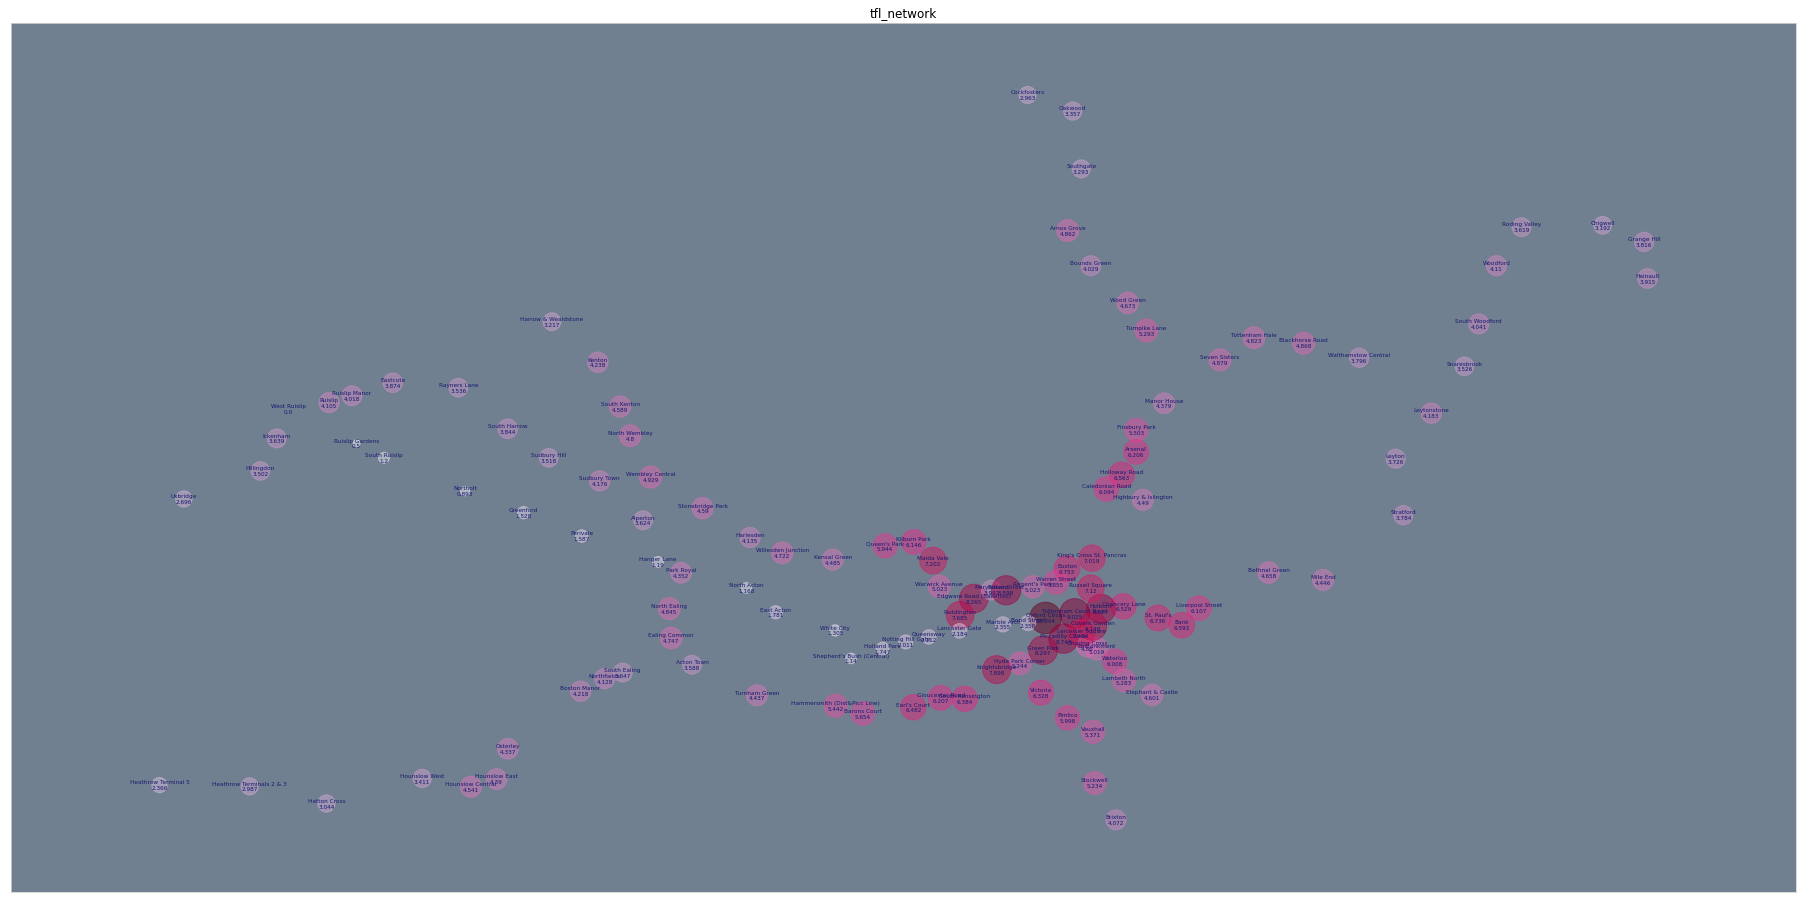

In [13]:
ot.temporal_closeness(tfl_network, optimality="fastest", add_data=True)

tfl_network.nodes.add_data("victoria_central_bakerloo_piccadilly-stations.csv")


ot.NodeScatter(tfl_network, x="lon", y="lat", bubble_metric="closeness")

plt.show()